# Beijing Air Quality

## Modeling - ARIMA MODEL

### Import packages and data

In [11]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
import pandas as pd
import numpy as np
from pmdarima import auto_arima    # for determining ARIMA orders
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
%matplotlib inline
# Ignore harmless warnings
warnings.filterwarnings("ignore")
df = pd.read_pickle('PKL/full.pkl')

### Check the auto correlation and partial auto correlation

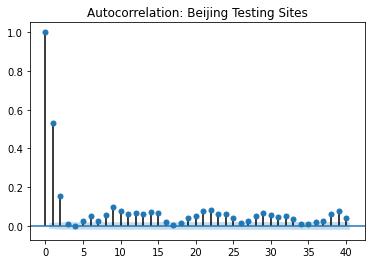

In [142]:
title = 'Autocorrelation: Beijing Testing Sites'
lags = 40
plot_acf(np.log(df['PM2.5']),title=title,lags=lags);

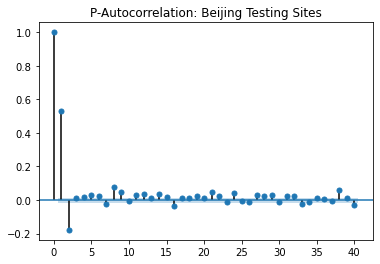

In [143]:
title = 'P-Autocorrelation: Beijing Testing Sites'
lags = 40
plot_pacf(np.log(df['PM2.5']),title=title,lags=lags);

### Load in the train and test sets

In [137]:
test = pd.read_pickle('PKL/test.pkl')
train = pd.read_pickle('PKL/train.pkl')


### Fit Auto ARIMA to find the best parameters for the ARIMA model

In [214]:
auto_arima(np.log(train['PM2.5'])).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1121
Model:               SARIMAX(0, 0, 2)   Log Likelihood               -1256.006
Date:                Thu, 10 Sep 2020   AIC                           2520.013
Time:                        22:20:03   BIC                           2540.100
Sample:                             0   HQIC                          2527.605
                               - 1121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0341      0.045     90.010      0.000       3.946       4.122
ma.L1          0.6237      0.032     19.262      0.000       0.560       0.687
ma.L2          0.2104      0.031      6.835      0.000       0.150       0.271
sigma2         0.5502      0.024     22.470      0.000       0.502       0.598
===================================================================================
Ljung-Box (Q):                       38.53   Jarque-Bera (JB):                75.80
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.62
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
### Use Auto ARIMA to find the best parameter for ARIMA

In [216]:
stepwise_fit = auto_arima(np.log(train['PM2.5']), start_p=0, start_q=0,
                         max_p=2, max_q=2, m=12,
                         seasonal=True,
                         d=None, trace=True,
                         error_action='ignore',   # we don't want to know if an order does not work
                         suppress_warnings=True,  # we don't want convergence warnings
                         stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2928.945, Time=2.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2928.371, Time=0.13 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2555.681, Time=1.63 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2566.527, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=6364.876, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2554.931, Time=0.16 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2555.728, Time=0.72 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=3.08 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2518.451, Time=0.42 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2517.832, Time=2.10 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=2519.110, Time=6.97 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=4.60 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2517.956, Time=1.11 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=10.06 sec
 ARIMA(2,0,1)(1,0,0)[12] intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1121
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -1253.916
Date:                            Thu, 10 Sep 2020   AIC                           2517.832
Time:                                    22:21:11   BIC                           2542.942
Sample:                                         0   HQIC                          2527.323
                                           - 1121                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1323      0.129     16.542      0.000       1.880       2.385
ar.L1          0.6322      0.032     19.486      0.000       0.569       0.696
ar.L2         -0.1879      0.032     -5.926      0.000      -0.250      -0.126
ar.S.L12       0.0490      0.028      1.744      0.081      -0.006       0.104
sigma2         0.5482      0.025     21.995      0.000       0.499       0.597
===================================================================================
Ljung-Box (Q):                       33.46   Jarque-Bera (JB):                75.19
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.62
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [217]:
model_PM = ARIMA(np.log(train['PM2.5']),order=(1,0,0))
results = model_PM.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                 1121
Model:                     ARMA(1, 0)   Log Likelihood               -1274.466
Method:                       css-mle   S.D. of innovations              0.754
Date:                Thu, 10 Sep 2020   AIC                           2554.931
Time:                        22:21:23   BIC                           2569.997
Sample:                    03-01-2013   HQIC                          2560.625
                         - 03-25-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0328      0.048     83.370      0.000       3.938       4.128
ar.L1.PM2.5     0.5348      0.025     21.127      0.000       0.485       0.584
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8698           +0.0000j            1.8698            0.0000
-----------------------------------------------------------------------------
"""

### Predict the values

In [218]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1

predictions_12 = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(0,0,0) Predictions')



In [219]:
predictions_12.head()

2016-03-26    3.357394
2016-03-27    3.671558
2016-03-28    3.839580
2016-03-29    3.929443
2016-03-30    3.977503
Freq: D, Name: ARIMA(0,0,0) Predictions, dtype: float64

In [220]:
#metrics for predicted accuracy
from sklearn.metrics import mean_squared_error

error = mean_squared_error(np.log(test['PM2.5']), predictions_12)
print(f'ARIMA(2,2,0) MSE Error: {error:18}')

from statsmodels.tools.eval_measures import rmse

error_rmse = rmse(np.log(test['PM2.5']), predictions_12)
print(f'ARIMA(2,2,0) RMSE Error: {error:18}')

ARIMA(2,2,0) MSE Error:  0.711341015425481
ARIMA(2,2,0) RMSE Error:  0.711341015425481


In [211]:
np.log(test).mean()

PM2.5    3.955179
dtype: float64

In [221]:
pred= predictions_12.reset_index()
type(pred)

pred["Date"] = pd.to_datetime(gh["index"])
pred = pred.set_index('Date')

pred = pred.rename(columns={'ARIMA(0,0,0) Predictions': 'Predicted PM2.5'})
pred = pred.drop(columns =['index'])
pred.head()

,Predicted PM2.5
Date,
2016-03-26,3.357394
2016-03-27,3.671558
2016-03-28,3.839580
2016-03-29,3.929443
2016-03-30,3.977503


In [224]:
pred.tail()

,Predicted PM2.5
Date,
2016-12-27,4.03276
2016-12-28,4.03276
2016-12-29,4.03276
2016-12-30,4.03276
2016-12-31,4.03276


In [222]:
df['Log_PM2.5'] = np.log(df['PM2.5'])

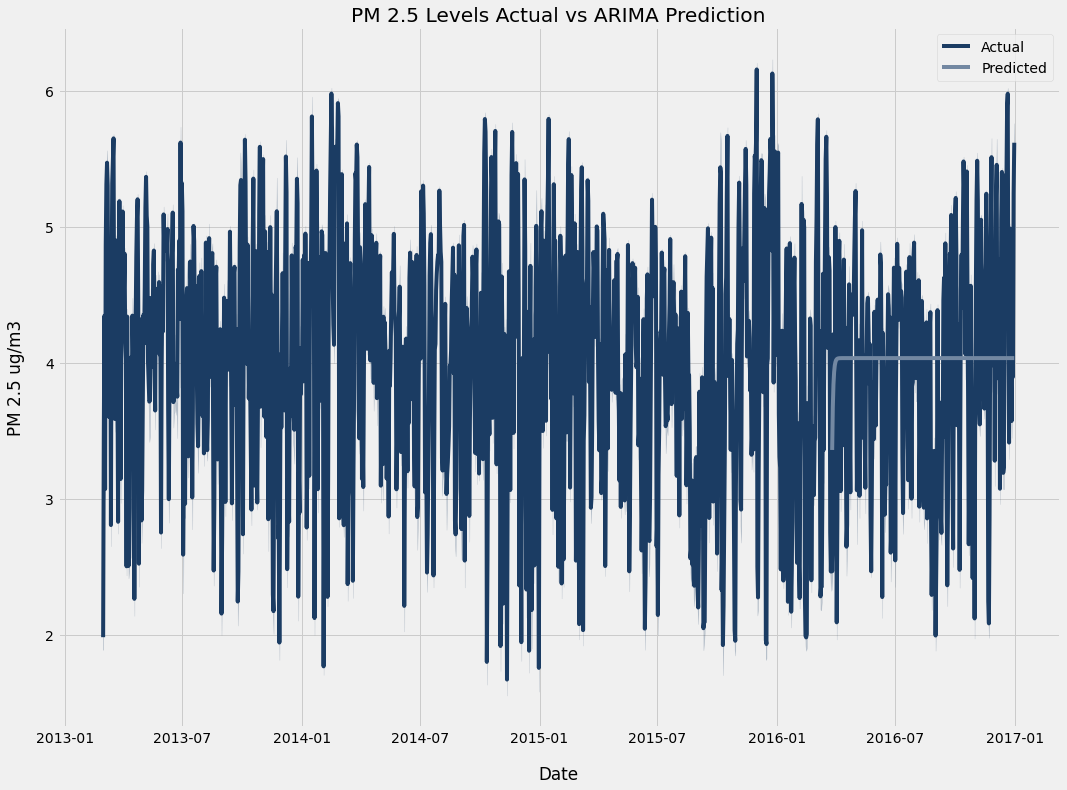

In [225]:
# Styling Guide 
plt.style.use('fivethirtyeight')
sns.set_palette(sns.diverging_palette(250,700, s= 80 , l= 25, n= 6))
fig, ax = plt.subplots(figsize=(16, 12))
sns.lineplot(y = 'Log_PM2.5', x = df.index, data = df, label = 'Actual')
sns.lineplot(y = 'Predicted PM2.5', x = pred.index, data = pred, label = 'Predicted')
plt.title('PM 2.5 Levels Actual vs ARIMA Prediction')
plt.xlabel('Date', labelpad=20)
plt.ylabel('PM 2.5 ug/m3', labelpad=20)
plt.legend()
plt.show()
#fig.savefig('PNG/ARIMA.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )